Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-10-da1e3bd31b55>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


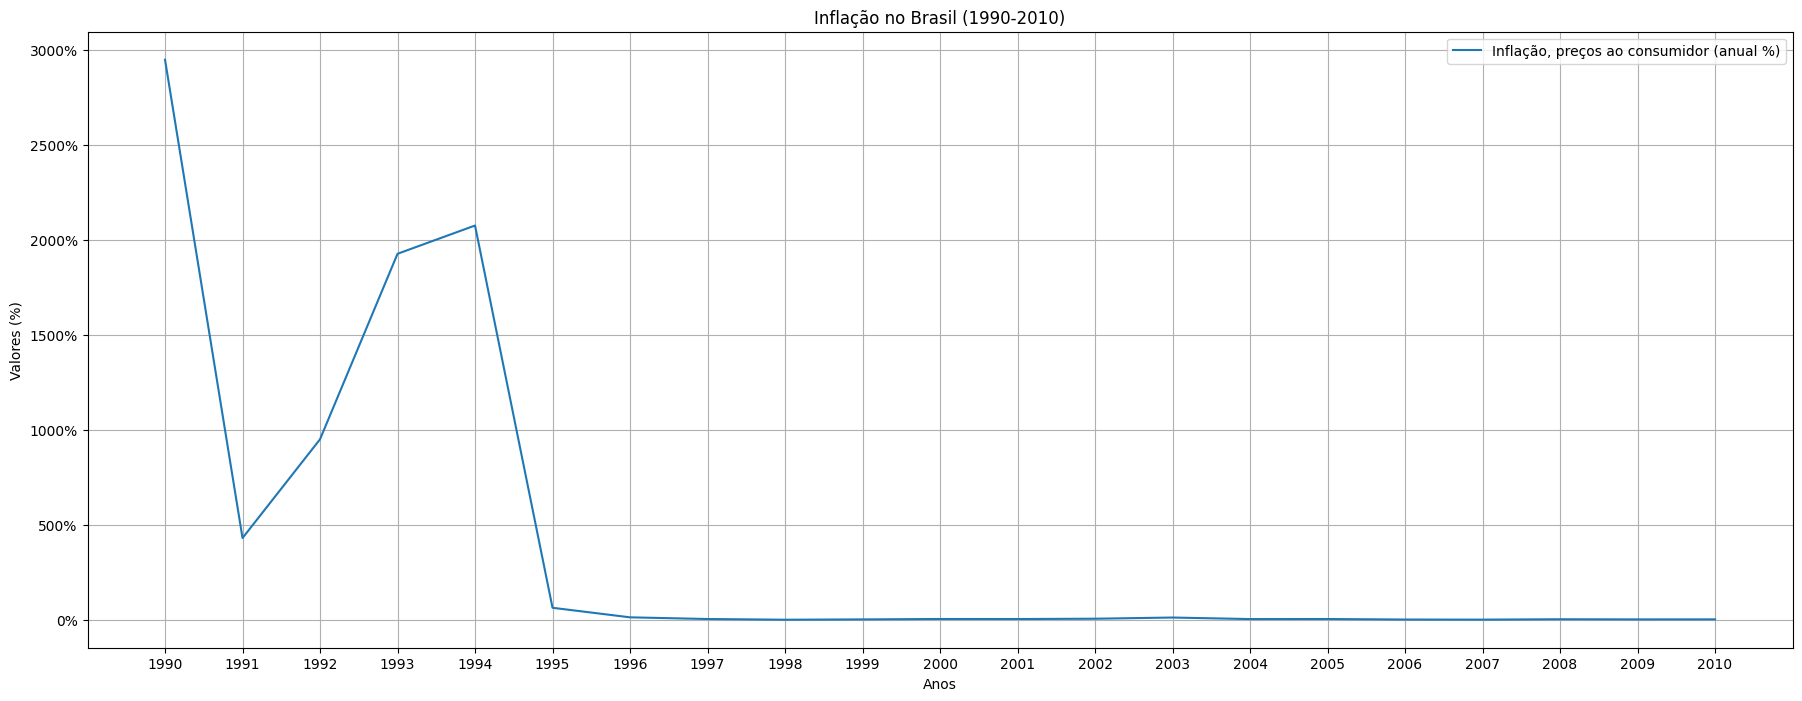

In [10]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

class DataAnalysis:
    def __init__(self, path, dataset):
        self.path = path
        self.dataset = dataset
        self.df = None

    def mount_drive(self):
        drive.mount('/content/gdrive')

    def load_data(self):
        try:
            self.df = pd.read_csv(self.path + self.dataset, sep=';', decimal=',')
        except FileNotFoundError:
            raise FileNotFoundError(f"Arquivo não encontrado na pasta. {self.path + self.dataset}")

    def analyze_data(self, indicator, country_code, years):
        columns = ['Country Code'] + years
        filtered_data = self.df[self.df['Indicator Name'].str.contains(indicator)][columns]
        filtered_data = filtered_data[filtered_data['Country Code'] == country_code]

        if filtered_data.empty:
            raise ValueError("Nenhum dado encontrado para os critérios especificados.")

        return filtered_data[years]

    def plot_graph(self, data, label, years):
        plt.figure(figsize=(22, 8))
        plt.plot(years, data.values[0], label=label)
        plt.xlabel('Anos')
        plt.ylabel('Valores (%)')
        plt.title('Inflação no Brasil (1990-2010)')
        plt.legend()
        plt.grid(True)
        plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])
        plt.show()

# Configurações
path = '/content/gdrive/MyDrive/'
dataset = 'wdi_paises_america_sul_series_validas.csv'
years = [str(year) for year in range(1990, 2011)]

# Inicializar a classe
analysis = DataAnalysis(path, dataset)

# Montar o Google Drive
analysis.mount_drive()

# Carregar o conjunto de dados
analysis.load_data()

# Analisar os dados para a inflação no Brasil
try:
    inflation_data = analysis.analyze_data('Inflation, consumer prices', 'BRA', years)

    # Plotar o gráfico de inflação
    analysis.plot_graph(inflation_data, 'Inflação, preços ao consumidor (anual %)', years)

except FileNotFoundError as e:
    print(f"Erro: {e}")
except ValueError as e:
    print(f"Erro: {e}")
